# Plotting 2D phase portraits in Julia

Here's some Julia code for plotting the possible different cases of $2 \times 2$ systems $x' = Ax$. The plots will have quiver plots showing the vector field $x' = Ax$ as a function of $x$, eigenvectors in blue and red, and trajectories for a number of initial values as solid black curves. 

In [1]:
using PyPlot

function phaseplot(A)
    xmag,ymag = 4,3
    xgrid = linspace(-xmag,xmag,20)
    ygrid = linspace(-ymag,ymag,20) 
    dxdt = [A[1,1]*x + A[1,2]*y for y in ygrid, x in xgrid]
    dydt = [A[2,1]*x + A[2,2]*y for y in ygrid, x in xgrid]
    quiver(xgrid, ygrid, dxdt, dydt, width=0.002)
    
    # calculate eigenvalues and eigenvectors
    (λ, V) = eig(A)
    
    @show λ
    @show V
    
    if isreal(λ)
        # A had real eigenvalues
        
        # are there two linearly indpendent eigenvectors or just one?
        # find out by examining singular values of eigenvector matrix v
        σ = svdvals(V)
        svdtol = 1e-06 # assume singluar value less than this indicates rank deficiency
           
        if (minimum(σ) > svdtol) 
            # A has two linearly independent eigenvectors
            v1 = V[:,1]
            v2 = V[:,2]

            # plot eigenvectors
            plot([0.0;  v1[1]], [0.0;  v1[2]], "b-", linewidth=2, label="v1")
            plot([0.0; -v1[1]], [0.0; -v1[2]], "b--")
            plot([0.0;  v2[1]], [0.0;  v2[2]], "r-", linewidth=2, label="v2")
            plot([0.0; -v2[1]], [0.0; -v2[2]], "r--")
    
            # plot trajectories over grid of initial values x₀, y₀
            t = linspace(0, 1, 100)
            for x₀ in linspace(-xmag, xmag, 6)
                for y₀ in linspace(-ymag, ymag, 6)
                    c = V\[x₀; y₀]  # solve for coefficients c of x in eigenvector basis
                    
                    x = c[1]*v1[1]*exp.(λ[1]*t) + c[2]*v2[1]*exp.(λ[2]*t)
                    y = c[1]*v1[2]*exp.(λ[1]*t) + c[2]*v2[2]*exp.(λ[2]*t)
                    
                    plot([x[1]], [y[1]], "ko", markersize=4)
                    plot(x, y, "k-", linewidth=1)
                end
            end
            title("real eigenvalues, two independent eigenvectors")
                   
        else 
            # A has only one linearly independent eigenvector            
            v = V[:,1]
            
            # Solve system (A-λI)u = v . This system is singular, so solve using SVD
            u = svdfact(A-λ[1]I)\v 
            
            # plot eigenvector v and vector u
            plot([0.0;  v[1]], [0.0;  v[2]], "b-", linewidth=2, label="v")
            plot([0.0; -v[1]], [0.0; -v[2]], "b--")
            plot([0.0;  u[1]], [0.0;  u[2]], "m-", linewidth=2, label="u")
            plot([0.0; -u[1]], [0.0; -u[2]], "m--")
    
            # set up matrix VU = [v, u] for solving for coeffs c in v,u basis 
            VU = hcat(v,u)
            
            # plot trajectories over grid of initial values x₀, y₀
            t = linspace(0, 4, 100)                     
             for x₀ in linspace(-xmag, xmag, 6)
                for y₀ in linspace(-ymag, ymag, 6)
                    c = VU\[x₀; y₀]  # solve for coefficients c of x in v,u basis
                    
                    x = c[1]*v[1]*exp.(λ[1]*t) + c[2]*(v[1]*t .+ u[1]).*exp.(λ[1]*t)
                    y = c[1]*v[2]*exp.(λ[1]*t) + c[2]*(v[2]*t .+ u[2]).*exp.(λ[2]*t)
                            
                    plot([x[1]], [y[1]], "ko", markersize=4)
                    plot(x, y, "k-", linewidth=1)
                end
            end
            title("real eigenvals, one independent eigenvector")
        end
  
    else
        # complex eigenvalues and eigenvectors
        vᵣ, vᵢ = real(V[:,1]), imag(V[:,1])      
        
        # plot real and imaginary parts of eigenvector
        plot([0.0;  vᵣ[1]], [0.0;  vᵣ[2]], "b-", linewidth=2, label="vr")
        plot([0.0; -vᵣ[1]], [0.0; -vᵣ[2]], "b--")
        plot([0.0;  vᵢ[1]], [0.0;  vᵢ[2]], "r-", linewidth=2, label="vi")
        plot([0.0; -vᵢ[1]], [0.0; -vᵢ[2]], "r--")
        
        # plot trajectories over grid of initial values x₀, y₀
        t = linspace(0, 4, 100)
        for x₀ in linspace(-xmag, xmag, 6)
            for y₀ in linspace(-ymag, ymag, 6)
                c = V\[x₀; y₀]  # solve for coefficients c of x in eigenvector basis
                x = real(c[1]*V[1,1]*exp.(λ[1]*t) + c[2]*V[1,2]*exp.(λ[2]*t))
                y = real(c[1]*V[2,1]*exp.(λ[1]*t) + c[2]*V[2,2]*exp.(λ[2]*t))
           
                plot([x[1]], [y[1]], "ko", markersize=4)
                plot(x, y, "k-",linewidth=1)
            end
        end
        title("complex eigenvalues")
    end
        
    xlim(-xmag, xmag)
    ylim(-ymag, ymag)
    xlabel("x")
    ylabel("y")
end


phaseplot (generic function with 1 method)

## Distinct real eigenvalues

In [2]:
A = [2 3 ; 2 1]
λ,V = eig(A)
@show λ;
V

λ = [4.0, -1.0]


2×2 Array{Float64,2}:
 0.83205  -0.707107
 0.5547    0.707107

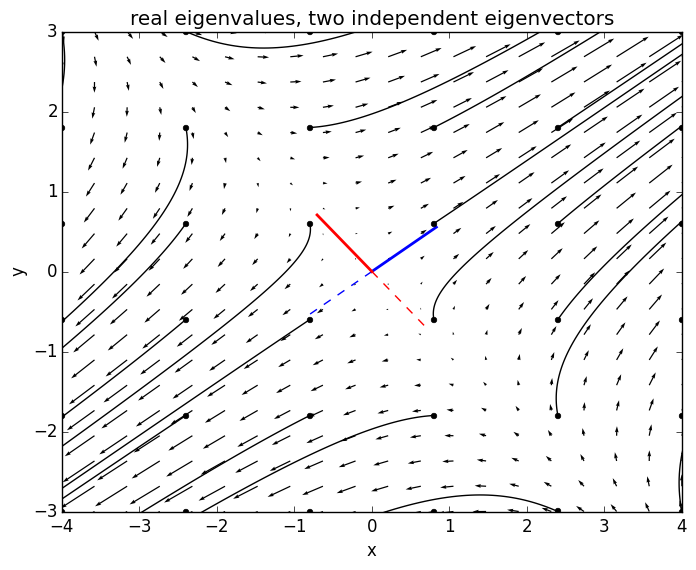

λ = [4.0, -1.0]
V = [0.83205 -0.707107; 0.5547 0.707107]


PyObject <matplotlib.text.Text object at 0x7f328063ddd0>

In [3]:
phaseplot(A)

In [4]:
A = [-3 1 ; 1 -3]
λ, V= eig(A)
@show λ
V

λ = [-4.0, -2.0]


2×2 Array{Float64,2}:
  0.707107  0.707107
 -0.707107  0.707107

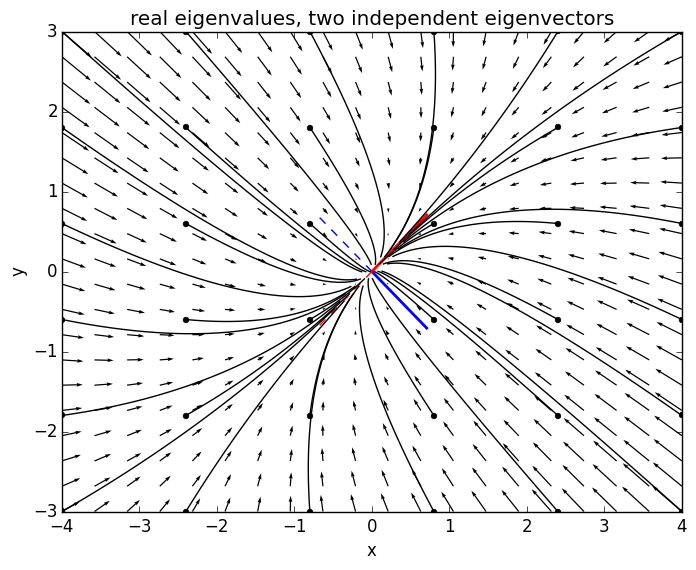

λ = [-4.0, -2.0]
V = [0.707107 0.707107; -0.707107 0.707107]


PyObject <matplotlib.text.Text object at 0x7f328048e050>

In [5]:
phaseplot(A)

## Complex eigenvalues

In [6]:
A = [1 -5 ; 2 3]
λ, V= eig(A)
@show λ
V

λ = Complex{Float64}[2.0+3.0im, 2.0-3.0im]


2×2 Array{Complex{Float64},2}:
  0.845154+0.0im        0.845154-0.0im     
 -0.169031-0.507093im  -0.169031+0.507093im

λ = Complex{Float64}[2.0+3.0im, 2.0-3.0im]
V = 

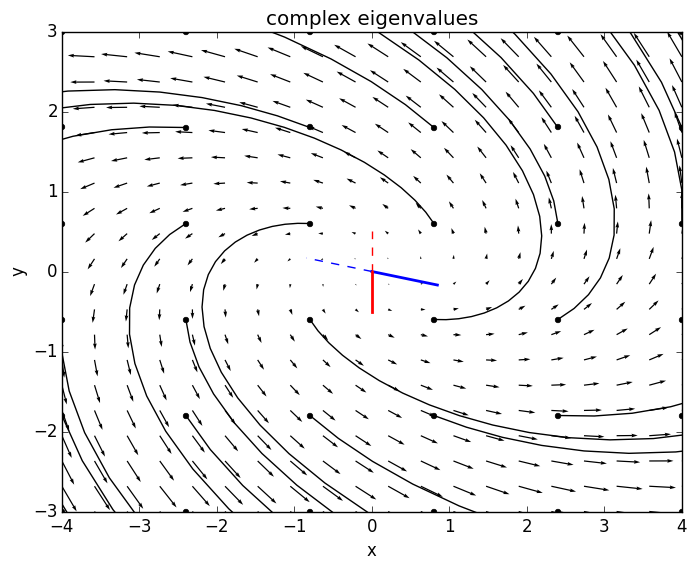

Complex{Float64}[0.845154+0.0im 0.845154-0.0im; -0.169031-0.507093im -0.169031+0.507093im]


PyObject <matplotlib.text.Text object at 0x7f327e149590>

In [7]:
phaseplot(A)

In [8]:
A = [-1 -5 ; 2 -3]
λ, V= eig(A)
@show λ
V

λ = Complex{Float64}[-2.0+3.0im, -2.0-3.0im]


2×2 Array{Complex{Float64},2}:
 0.845154+0.0im       0.845154-0.0im     
 0.169031-0.507093im  0.169031+0.507093im

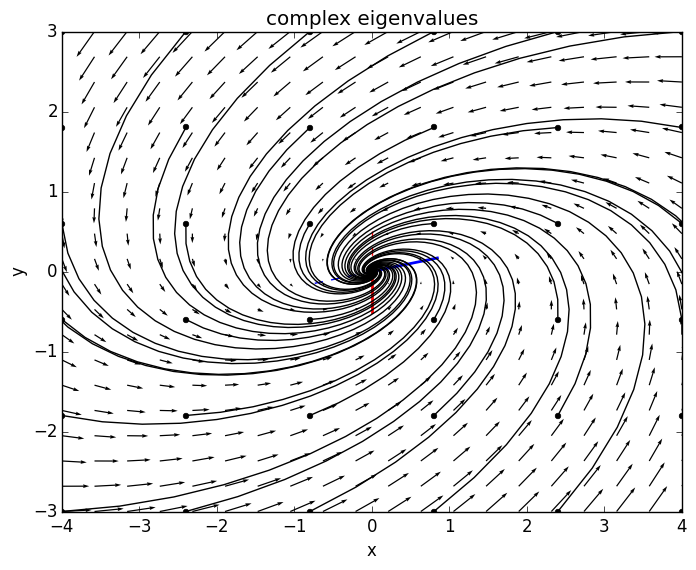

λ = Complex{Float64}[-2.0+3.0im, -2.0-3.0im]
V = Complex{Float64}[0.845154+0.0im 0.845154-0.0im; 0.169031-0.507093im 0.169031+0.507093im]


PyObject <matplotlib.text.Text object at 0x7f3279efe410>

In [9]:
phaseplot(A)

## Repeated real eigenvalues with linearly independent eigenvectors

In [10]:
A = [2 0; 0 2]
λ,V = eig(A)
@show λ;
V

λ = [2.0, 2.0]


2×2 Array{Float64,2}:
 -1.0  -0.0
 -0.0   1.0

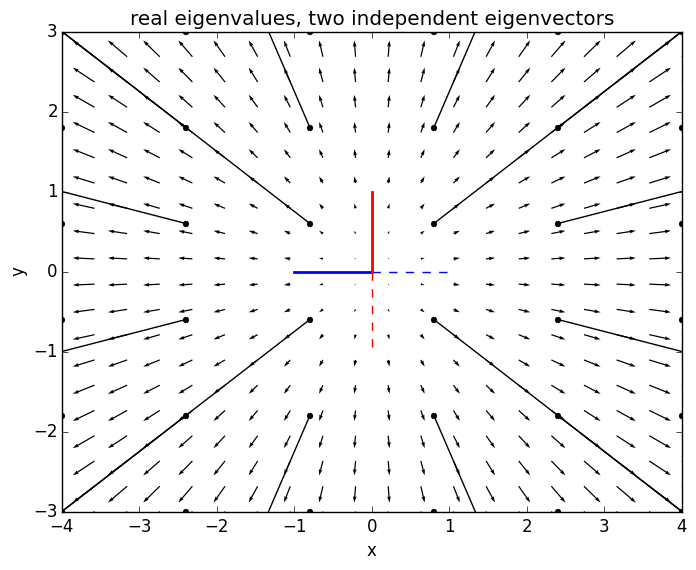

λ = [2.0, 2.0]
V = [-1.0 -0.0; -0.0 1.0]


PyObject <matplotlib.text.Text object at 0x7f3279cccf90>

In [11]:
phaseplot(A)

## Repeated real eigenvalues, one linearly independent eigenvector

In [13]:
A = [1 -1 ; 1 3]
λ,V = eig(A)
@show λ;
V

λ = [2.0, 2.0]


2×2 Array{Float64,2}:
 -0.707107  -0.707107
  0.707107   0.707107

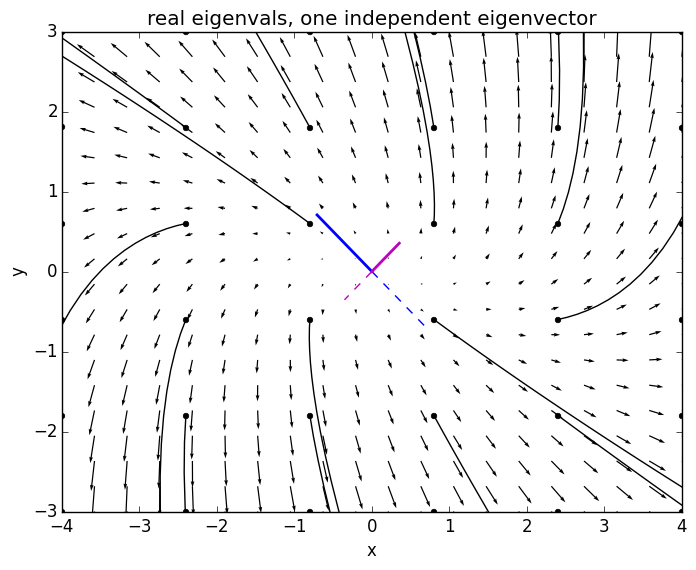

λ = [2.0, 2.0]
V = [-0.707107 -0.707107; 0.707107 0.707107]


PyObject <matplotlib.text.Text object at 0x7f3279b29190>

In [14]:
phaseplot(A)

Here the one independent eigenvector $v$ is shown in blue, and the solution $u$ of $(A-\lambda I)u=v$ is shown in magenta.